# Week 6

Phew. Is it week 6 already? 

Last week we had an intro to machine learning and regression and this week we continue with some more ML but focusing on classification instead. There are lots of courses on machine learning at DTU. And across many research areas, people use ML for all kinds of things. So there's a good chance you're already familiar with what's going to happen today. 

In the following, we continue introducing fundamentals of ML, decision trees and start with some prediction tasks on crime data. You might ask, why are we doing this? Well, a couple of reasons:

1. It ties nicely with how we started this course: do you remember all we learnt about predictive policing in Week 1? So, today it is our turn to make predictions and see how well we can do with the data we have been exploring.

2. Visualization **AND** machine learning is a powerful combination. A combination that is pretty rare. 
  - Usually it's the case that people are either good at machine learning or data viz, but not both. 
  - So what we will be able to do in this class is an unusual combo: We can use ML to understand data and then visualize the outputs of the machine-learning.
    
The plan for today is as follows:

1. In part 1, we go more in depth on fundamentals of machine learning;
2. In part 2, we get an introduction to Decision Trees;
3. In part 3, we put everything together to predict criminal recidivism.

## Part 1: Fundamentals of machine learning 

We continue with a couple of lectures from Ole Winter about model selection and feature extraction. These connect nicely with what you should have already read in DSFS Chaper 11. If you did not read the chater yet, it is time for you to do it. 

Find it on DTU Learn under 'Course content' $\rightarrow$ 'Content' $\rightarrow$ 'Lecture 6 reading' 

**Model selection**
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/MHhlAtw3Ces/0.jpg)](https://www.youtube.com/watch?v=MHhlAtw3Ces)

**Feature extraction and selection**
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/RZmitKn220Q/0.jpg)](https://www.youtube.com/watch?v=RZmitKn220Q)

> *Exercise 1*: A few questions about machine learning to see whether you've read the text and watched the videos. 
>
> * What do we mean by a 'feature' in a machine learning model?

<br> "Features are whatever inputs we provide to our model. + e.g. In the simplest case, features are simply given to you. If you want to predict someone’s salary based on her years of experience, then years of experience is the only feature you have. (maybe squaring, cubing.. your input features might improve your model performance) + feature can be categorical or numerical -> different models need different input (Naive Bayes classifier [yes-no-features], Regression models [numeric features], decision trees [numeric or categorical features] + might be hard to choose the right amount" (reading 1 week 6, chapter "Feature Extraction and Selection")

> * What is the main problem with overfitting?

<br> "A common danger in machine learning is overfitting—producing a model that performs well on the data you train it on but that generalizes poorly to any new data. This could involve learning noise in the data. Or it could involve learning to identify
specific inputs rather than whatever factors are actually predictive for the desired output (complex models lead to overfitting -> train (often 2/3-s of the data), test and validation split) -> overfitting goof performance on train data, but bad performance on test data (if so good hint, but maybe model still overfitts for the overall problem as there was a common patter in the train and test data + another issue: choosing the right model -> "split the data into three parts: a training set for building models, a validation set for choosing among trained models, and a test set for judging the final model.)." (reading 1 week 6, chapter "Overfitting, Underfitting")

<br> the model complexity should reflect the complexity of the data + overfitting = fitting to the noice of the data (+ little data -> we need to recycle the data e.g. cross validation, nested cross validation)

[Overfitting Error Model Complexitiy](https://github.com/Philipp-Otter/socialdata2022/blob/main/files/overfitting_underfitting_error.png)

[Data Split](https://github.com/Philipp-Otter/socialdata2022/blob/main/files/data_split.png)

[Cross Validation](https://github.com/Philipp-Otter/socialdata2022/blob/main/files/cross_validation.png)


> * Explain the connection between the bias-variance trade-off and overfitting/underfitting.

<br> "Both are measures of what would happen if you were to retrain your model many times on different sets of training data (from the same larger population). + For example, the degree 0 model in “Overfitting and Underfitting” on page 142 will make a lot of mistakes for pretty much any training set (drawn from the same population), which means that it has a high bias. However, any two randomly chosen
training sets should give pretty similar models (since any two randomly chosen training sets should have pretty similar average values). So we say that it has a low variance. High bias and low variance typically correspond to underfitting. + On the other hand, the degree 9 model fit the training set perfectly. It has very low bias but very high variance (since any two training sets would likely give rise to very different models). This corresponds to overfitting. + If your model has high bias (which means it performs poorly even on your training data) then one thing to try is adding more features. Going from the degree 0 model in “Overfitting and Underfitting” on page 142 to the degree 1 model was a big improvement. + If your model has high variance, then you can similarly remove features. But another solution is to obtain more data (if you can). + Holding model complexity constant, the more data you have, the harder it is to overfit. + On the other hand, more data won’t help with bias. If your model doesn’t use enough features to capture regularities in the data, throwing more data at it won’t help." (reading 1 week 6, chapter "The Bias-Variance Trade-off")

> * The `Luke is for leukemia` on page 145 in the reading is a great example of why accuracy is not a good measure in very unbalanced problems. Try to come up with a similar example based on a different type of data (either one you are interested in or one related to the SF crime dataset).

<br> a kid named Chris becoming good at soccer

## Part 2: Decision Tree Intro

Now we turn to decision trees. This is a fantastically useful supervised machine-learning method, that we use all the time in research. To get started on the decision trees, we asked you to read DSFS, chapter 17 (if you didn't read it you can find it in DTU Learn). 

And our little session on decision trees wouldn't be complete without hearing from Ole about these things. 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/LAA_CnkAEx8/0.jpg)](https://www.youtube.com/watch?v=LAA_CnkAEx8)

> *Exercise 2:* Just a few questions to make sure you've read the text (DSFS chapter 17) and/or watched the video.
> 
> * There are two main kinds of decision trees depending on the type of output (numeric vs. categorical). What are they?

<br> "Most people divide decision trees into classification trees (which produce categorical outputs) and regression trees (which produce numeric outputs)." (reading 2 week 6, chapter "What Is a Decision Tree?")

> * Explain in your own words: Why is entropy useful when deciding where to split the data?

<br> "Ideally, we’d like to choose questions whose answers give a lot of information about what our tree should predict. If there’s a single yes/no question for which “yes” answers always correspond to True outputs and “no” answers to False outputs (or vice versa), this would be an awesome question to pick. Conversely, a yes/no question for which neither answer gives you much new information about what the prediction should be is probably not a good choice. We capture this notion of “how much information” with entropy. You have probably heard this used to mean disorder. We use it to represent the uncertainty associated with data. + Imagine that we have a set S of data, each member of which is labeled as belonging to one of a finite number of classes C1, ..., Cn. If all the data points belong to a single class, then there is no real uncertainty, which means we’d like there to be low entropy. If the data points are evenly spread across the classes, there is a lot of uncertainty and we’d like there to be high entropy." (reading 2 week 6, chapter "Entropy")
<br> "Correspondingly, we’d like some notion of the entropy that results from partitioning a set of data in a certain way. We want a partition to have low entropy if it splits the data into subsets that themselves have low entropy (i.e., are highly certain), and high
entropy if it contains subsets that (are large and) have high entropy (i.e., are highly uncertain)." (reading 2 week 6, chapter "The Entropy of a Partition")

> * Why are trees prone to overfitting?

<br> "One problem with this approach is that partitioning by an attribute with many different values will result in a very low entropy due to overfitting. -> e.g. partitioning on social security numbers will produce one-person subsets with zero entropy -> based on social security number, so cannot be generalised beyond the training set" (reading 2 week 6, chapter "The Entropy of a Partition")


> * Explain (in your own words) how random forests help prevent overfitting.

<br> "One way of avoiding overfitting is a technique called random forests, in which we build multiple decision trees and let them vote on how to classify inputs. + Since each tree is built using different data, each tree will be different from every other tree. + A second source of randomness involves changing the way we chose the best_attribute to split on. Rather than looking at all the remaining attributes, we first choose a random subset of them and then split on whichever of those is best." (reading 2 week 6, chapter "Random Forests")

**In the following I added some additional material for you to explore decision trees through some fantastic *visual* introductions.** 

*Decision Trees 1*: The visual introduction to decision trees on this webpage is AMAZING. Take a look to get an intuitive feel for how trees work. Do not miss this one, it's a treat! http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

*Decision Trees 2*: the second part of the visual introduction is about the topic of model selection, and bias/variance tradeoffs that we looked into earlier during this lesson. But once again, here those topics are visualized in a fantastic and inspiring way, that will make it stick in your brain better. So check it out http://www.r2d3.us/visual-intro-to-machine-learning-part-2/



*Decision tree tutorials*: And of course the best way to learn how to get this stuff rolling in practice, is to work through a tutorial or two. We recommend the ones below:
  * https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
  * https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 (this one also has good considerations regarding the one-hot encodings)
  
(But there are many other good ones out there.)

## Part 3: Predicting criminal recidivism

It is now time to put everything together and use the models we have read about for prediction. Today, we are still going to focus on crimes, but with a different dataset. 

The dataset is related to an algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism). It consists of information about defendants and variables used to measure recidivism. 

I'll provide you with more information about this data and its source next week. But, for now I don't want to give you more spoilers (you'll know why next week 😇), so let's get started. In the next exercises, we will try to **loosely** recreate the algorithm to predict whether a person is going to re-commit a crime in the future.

> *Exercise 3.1:* Getting the data ready. Before getting to predictions, we need to get the data, select the features, and define the target. Follow these steps for success:
>
> * Download the dataset from [GitHub](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv) and load it in a `pandas` dataframe.
> * Select the variables of interest. Here, a description of which one and their meaning:
>    1. `age`: age (in years) of the person,;
>    2. `sex`: either "Female" or "Male";
>    3. `race`: a variable encoding the race of the person;
>    4. `juv_fel_count`: the number of previous juvenile felonies;
>    5. `juv_misd_count`: the number of previous juvenile misdemeanors;
>    6. `juv_other_count`: the number of prior juvenile convictions that are not considered either felonies or misdemeanors;
>    7. `priors_count`: the number of prior crimes committed;
>    8. `is_recid`: if the defendent has recommit a crime;
>    9. `days_b_screening_arrest`: Days between the arrest and screening.
>    9. `c_charge_degree`: Degree of the crime. It is either M (Misdemeanor), F (Felony), or O (not causing jail)
>
> * Finally, we need a target:
>    * `two_year_recid` is what we want to predict. Its current values are $\in\left[0,1\right]$, where $0$ means the defendant did not recommit a crime within two years, and $1$ means the defendant recommitted a crime within two years.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to see all columns when e.g. calling the head function
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# import data
recidivism = pd.read_csv('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv')

Alright, we now have the data, but we still need a bit of **preprocessing** before we can get to the actual prediction.

At the beginning, I wanted you to embed everything into a unique pipeline. I later found that it sometimes have issues (throw errors, takes long time when cross-validating, etc.). Thus, I have excluded this step from today's class. However, if you want to know more about pipelines, here, a nice optional tutorial for you:

* https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6

> *Exercise 3.2:* Data preprocessing and label encoding. 
>
> * To preprocess the data follow these steps:
>    * filter out records where the `is_recid` feature is not known (i.e. where it is equal to -1); 
>    * only keep records that cause jail time;
>    * only keep records that have between $-30$ and $30$ days between the arrest and screening.
>    * Finally, drop `is_recid`, `c_charge_degree`, `days_b_screening_arrest` for the upcoming analysis.
> * Before we move on, let's explore the data with a few visualizations. Use the variable `two_year_recid` and create a plot with the following subplots: 
>     * A bar plot with the number of recommitted and non-recommitted crimes, e.g., number of 0s and 1s in `two_year_recid`. Now a couple of questions: What is the fraction of recommitted crimes over the total number of records? Is it balanced?
>     * A bar plot with the fraction of recommitted crimes over total number of records per `sex`, e.g., the number of Females that recommitted a crime over the number of all female records. What do you observe? 
>     * A bar plot with the fraction of recommitted crimes over total number of records per `race` (compute as above). What do you observe?
>     * A bar plot with the fraction of recommitted crimes over total number of records per `age` group (group ages as <20, 20-30, 30-40, etc. and compute as above). What do you observe?
> * Some features we are working with are categorical, so we need to deal with them by using encoders. There are many different types, but we will focus on the `OneHotEncoder` and the `LabelEncoder`:
>    * Describe what these encoder do and choose one. Which one did you choose? Why?
>    * What variables need to be transformed? 

<mark> **Note** The data source that I was using has changed, so the data currently doesn't include `is_recid=-1`and `c_charge_degree='O'`. Please, write the code as if you were filtering those variables anyway, it is a way for you to practice with `pandas`.</mark>

In [5]:
# 3.2.1 Preprocessing 

# 0. drop all columns except 'age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'is_recid',
#                            'days_b_screening_arrest', 'c_charge_degree', 'two_year_recid'

recidivism = recidivism[['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'is_recid',
                         'days_b_screening_arrest', 'c_charge_degree', 'two_year_recid']]

# 1. filter out records where the `is_recid` feature is not known (i.e. where it is equal to -1)

recidivism = recidivism.drop(recidivism[recidivism.is_recid == -1].index)

# 2. only keep records that cause jail time

recidivism = recidivism.drop(recidivism[recidivism.c_charge_degree == 'O'].index)

# 3. only keep records that have between $-30$ and $30$ days between the arrest and screening

recidivism = recidivism.drop(recidivism[(recidivism.days_b_screening_arrest <= -30) | (recidivism.days_b_screening_arrest >= 30) | \
    (recidivism.days_b_screening_arrest.isna())].index)
    
# 4. drop `is_recid`, `c_charge_degree`, `days_b_screening_arrest` for the upcoming analysis

recidivism = recidivism.drop(columns = ['is_recid', 'c_charge_degree', 'days_b_screening_arrest'])

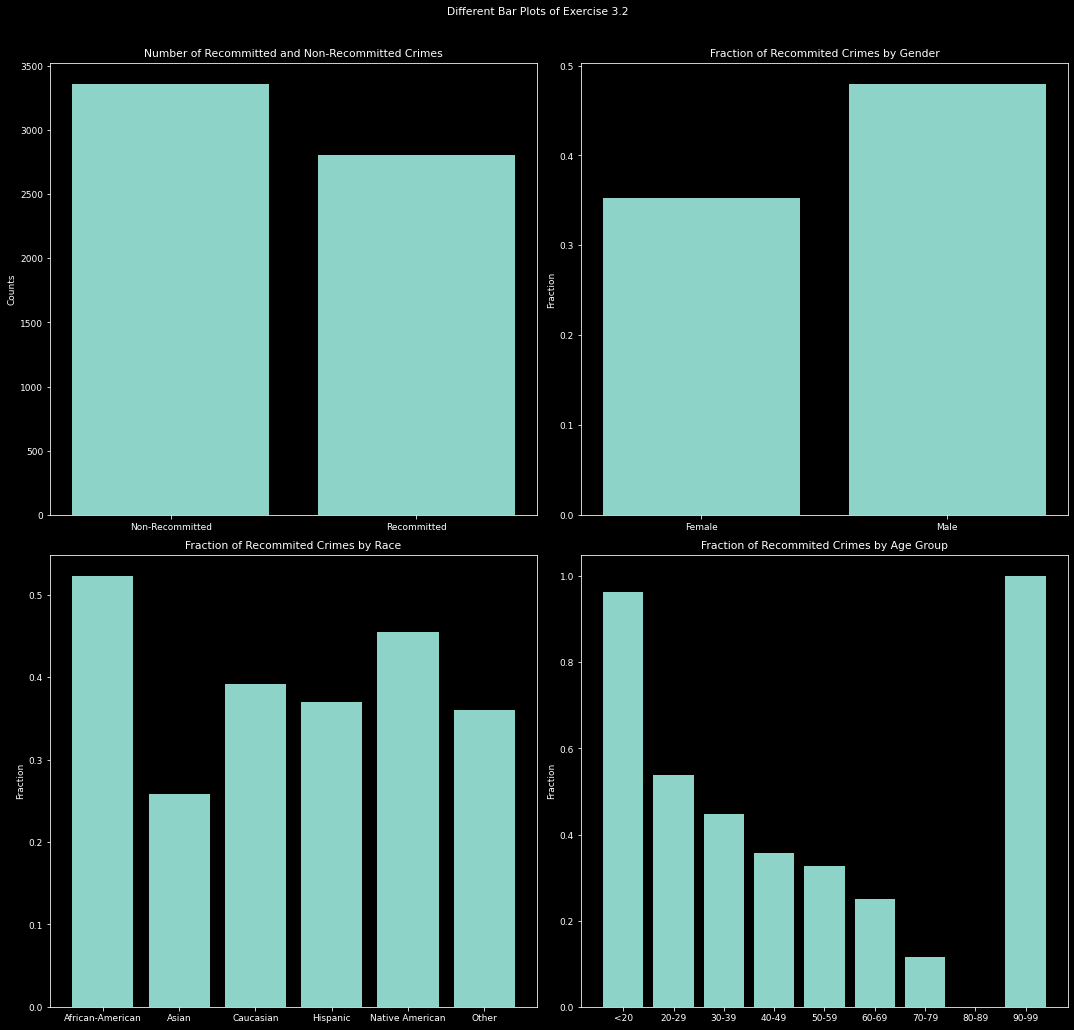

In [16]:
# 3.2.2 Some visualizations to explore the data -> Use the variable `two_year_recid` and create a plot with the following subplots

fig = plt.figure(figsize=(15, 15))

# 1. subplot: A bar plot with the number of recommitted and non-recommitted crimes, e.g., number of 0s and 1s in `two_year_recid`. 

recidivism_count = recidivism.groupby(['two_year_recid']).agg({'two_year_recid':'count'}).rename(columns={'two_year_recid':'Count'})\
    .reset_index()
ax = fig.add_subplot(2, 2, 1)
ax.bar(['Non-Recommitted', 'Recommitted'], recidivism_count['Count'])
ax.set_ylabel('Counts')
ax.set_title('Number of Recommitted and Non-Recommitted Crimes')

# 2. subplot: A bar plot with the fraction of recommitted crimes over total number of records per `sex`, 
#             e.g., the number of Females that recommitted a crime over the number of all female records. 

recidivism_by_sex = recidivism.groupby(['sex', 'two_year_recid']).agg({'two_year_recid':'count'}).\
    rename(columns={'two_year_recid':'Fraction'}).reset_index()
recidivism_by_sex['Fraction'] = recidivism_by_sex.Fraction / recidivism_by_sex.groupby("sex")["Fraction"].transform("sum")
recidivism_by_sex = recidivism_by_sex.drop(recidivism_by_sex[recidivism_by_sex.two_year_recid == 0].index)

ax = fig.add_subplot(2, 2, 2)
ax.bar(recidivism_by_sex['sex'], recidivism_by_sex['Fraction'])
ax.set_ylabel('Fraction')
ax.set_title('Fraction of Recommited Crimes by Gender')

# # 3. subplot: A bar plot with the fraction of recommitted crimes over total number of records per `race` (compute as above). 

recidivism_by_race = recidivism.groupby(['race', 'two_year_recid']).agg({'two_year_recid':'count'}).\
    rename(columns={'two_year_recid':'Fraction'}).reset_index()
recidivism_by_race['Fraction'] = recidivism_by_race.Fraction / recidivism_by_race.groupby("race")["Fraction"].transform("sum")
recidivism_by_race = recidivism_by_race.drop(recidivism_by_race[recidivism_by_race.two_year_recid == 0].index)

ax = fig.add_subplot(2, 2, 3)
ax.bar(recidivism_by_race['race'], recidivism_by_race['Fraction'])
ax.set_ylabel('Fraction')
ax.set_title('Fraction of Recommited Crimes by Race')

# # 4. subplot: A bar plot with the fraction of recommitted crimes over total number of records per `age` group 
# #             (group ages as <20, 20-30, 30-40, etc. and compute as above).

bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99, 200]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '<99']
recidivism['age_range'] = pd.cut(recidivism.age, bins, labels = labels,include_lowest = True)

recidivism_by_age_group = recidivism.groupby(['age_range', 'two_year_recid']).agg({'two_year_recid':'count'})\
    .rename(columns={'two_year_recid':'Fraction'}).reset_index()
recidivism_by_age_group['Fraction'] = recidivism_by_age_group.Fraction / recidivism_by_age_group.groupby("age_range")["Fraction"].\
    transform("sum")
recidivism_by_age_group = recidivism_by_age_group.drop(recidivism_by_age_group[recidivism_by_age_group.two_year_recid == 0].index)

ax = fig.add_subplot(2, 2, 4)
ax.bar(recidivism_by_age_group['age_range'], recidivism_by_age_group['Fraction'])
ax.set_ylabel('Fraction')
ax.set_title('Fraction of Recommited Crimes by Age Group')
recidivism = recidivism.drop(columns = ['age_range'])

#

plt.rcParams.update({'font.size': 9})
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Different Bar Plots of Exercise 3.2')
plt.show()

# clear variables
# del ax, bins, fig, labels, recidivism_by_age_group, recidivism_by_race, recidivism_count, recidivism_by_sex

**Question subplot 1: What is the fraction of recommitted crimes over the total number of records? Is it balanced?**
<br> slightly less recommitted crimes

**Question subplot 2: What do you observe?**
<br> way more men recommitted a crime

**Question subplot 3: What do you observe?**
<br> weird that there is no bar for white americans
<br> graphs are not that meaningful as you do not have an idea about the sample size

**Question subplot 4: What do you observe?**
<br> the younger the people the more people recommit a crime, but smaller 20 and 90-99 have rather small sample size

In [52]:
# 3.2.3 Feature Engineering -> one hot encoding applied on the race column and label encoding on the sex column

# Get one hot encoding of column race
one_hot = pd.get_dummies(recidivism['race'], prefix = 'race')
# Drop column race as it is now encoded
recidivism = recidivism.drop('race',axis = 1)
# Join the encoded df
recidivism = recidivism.join(one_hot)

# label encoding on the sex column (0 -> Female; 1 -> Male)
recidivism['sex'] = recidivism['sex'].astype('category')
recidivism['sex'] = recidivism['sex'].cat.codes

**Describe what these encoders (`OneHotEncoder` and `LabelEncoder`) do and choose one. Which one did you choose? Why?**
<br> Label-encoding assigns an ascending numerical value to the unique categorical values of a column. The problem is that the model will misunderstand the results, interpreting, for example, an order like 0 < 1 < 2.  One-hot-encoding overcomes this problem by assigning a column to all unique categorical values of a column. If the sample (row) belongs to a certain categorical value, the value in this specific column will be one and in all the others zero.

**What variables need to be transformed?**
<br> sex could be one hot encoded, but only two values, so label encoding is fine as well
<br> race should be one hot encoded

**We are almost there! It is now time to make predictions.**

> *Exercise 3.3:* Build a Decision Tree or a Random Forest. Now we are going to build a Decision Tree (or a Random Forest) classifier that takes as input the features defined above and predicts if a person is going to recommit the crime within two years.
> * Split the data in Train/Test sets. You can do this with `train_test_split` in `sklearn`, I used a 70/30 split, but you are free to try different ones. 
>     * **Note:** create a balanced dataset, that is, **grab an equal number of examples** from each target value.
>    * Fit a model to your Train set. A good option is the  `DecisionTreeClassifier` (or even better a [Random Forest](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html), here is [another tutorial for Random Forests](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)).
> * Evaluate the performance of model on the test set (look at Accuracy, Precision, and Recall). What are your thoughts on these metrics? Is accuracy a good measure?
>    * **hint:** Since you have created a balanced dataset, the baseline performance (random guess) is 50%. 
> * Are your results tied to the specific training data/hyperparameter set you used? Try to perform a `RandomizedSearchCV` and recompute the performance metric above with the hyperparameters found. [Here](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) a nice tutorial for you! And here one on [cross-validation](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f) for those of you who crave for more.
> * Visualize the tree. There are different options to do so. The easiest one is to use `plot_tree`, but there are other [options](https://mljar.com/blog/visualize-decision-tree/). If you chose Random Forest, you can visualize a tree as well by extracting a single tree with `model.estimators_[n]` (n is the index of the estimator you want to select).
> * Visualize the Feature Importance. What do you observe?
> * **(Optional)** If you find yourself with extra time, come back to this exercise and tweak the encoder, model, and variables you use to see if you can improve the performance of the tree. **Note**: It's not 100% given that adding variables will improve your predictive performance.

In [53]:
# Exercise 3.3

# 3.3.1

# a)
# split the data set in train and test set (70/30 split) -> balanced data set grab equal amount of each target value
# train_test_split by sklearn

X = recidivism.loc[:, ~recidivism.columns.isin(['two_year_recid'])]
#0 = defendant did not recommit a crime within two years; 1 = the defendant recommitted a crime within two years
y = recidivism['two_year_recid']

from sklearn.model_selection import train_test_split 
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42, sampling_strategy=1)
X_res, y_res = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=42) 

# to check if equal amount of each target value
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

# b)
# fit randomforest or DecisionTreeClassifier

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000)
# Train the model on training data
rf.fit(X_train, y_train)

(array([0, 1], dtype=int64), array([2275, 2276], dtype=int64))
(array([0, 1], dtype=int64), array([976, 975], dtype=int64))


RandomForestRegressor(n_estimators=1000)

In [54]:
# 3.3.2

# Are your results tied to the specific training data/hyperparameter set you used? -> I guess

# feature importance
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_imp) 
# drop features with low importance -> X = recidivism.loc[:, recidivism.columns.isin(['age', 'priors_count'])] might be enough

# prediction
y_pred=rf.predict(X_test)

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))

# precision and recall
print(metrics.classification_report(y_test, y_pred))

# !!! Confusion matrix would be also helpful !!!

age                      0.417401
priors_count             0.297821
sex                      0.062281
race_Caucasian           0.041021
race_African-American    0.040384
juv_other_count          0.039189
race_Hispanic            0.027619
juv_misd_count           0.025248
juv_fel_count            0.023148
race_Other               0.019421
race_Asian               0.004795
race_Native American     0.001672
dtype: float64
Mean Absolute Error: 0.39 degrees.
Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.60      0.63      0.62       976
           1       0.61      0.59      0.60       975

    accuracy                           0.61      1951
   macro avg       0.61      0.61      0.61      1951
weighted avg       0.61      0.61      0.61      1951



**3.2.2 Thoughts on accuracy, precision and recall?** 
(**hint:** Since you have created a balanced dataset, the baseline performance (random guess) is 50%.)

<br> **accuracy:** "Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right." -> only use it, when data set is balanced! -> seems rather low as it only 10 percent better then flipping a coin
<br> **precision:** "Precision is the number of correctly-identified members of a class divided by all the times the model predicted that class. In the case of Aspens, the precision score would be the number of correctly-identified Aspens divided by the total number of times the classifier predicted “Aspen,” rightly or wrongly." -> 
<br> **recall:** "Recall is the number of members of a class that the classifier identified correctly divided by the total number of members in that class. For Aspens, this would be the number of actual Aspens that the classifier correctly identified as such." ->
<br> **F1-score:** "F1 score is a little less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high, too. If they are both low, F1 will be low. If one is high and the other low, F1 will be low. F1 is a quick way to tell whether the classifier is actually good at identifying members of a class, or if it is finding shortcuts (e.g., just identifying everything as a member of a large class)." -> the model seems equally bad at predicting if the person recommitted a crime within in the next two years or not 

https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

In [55]:
# 3.2.3 Results toed to specific training data/ hyperparameter set?

# RandomizedSearchCV -> recompute the performance metric above with the hyperparameters found

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)


# Random Hyperparameter Grid

# Number of trees in random forest (current random forest model n_estimators = 1000)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 1000)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

### Evaluate Random Search

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred - y_test)
    accuracy = metrics.accuracy_score(y_test, y_pred).round(2)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1162, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Model Performance
Average Error: 0.4018 degrees.
Accuracy = 0.60%.
Model Performance
Average Error: 0.3332 degrees.
Accuracy = 0.67%.
Improvement of 11.67%.


In [56]:
# continuation of 3.2.3

# based on rf_random.best_params_

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [10],
    'n_estimators': [162]
}
# Create a based model
rf_grid = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 162}
Model Performance
Average Error: 0.3296 degrees.
Accuracy = 0.67%.
Improvement of 11.67%.


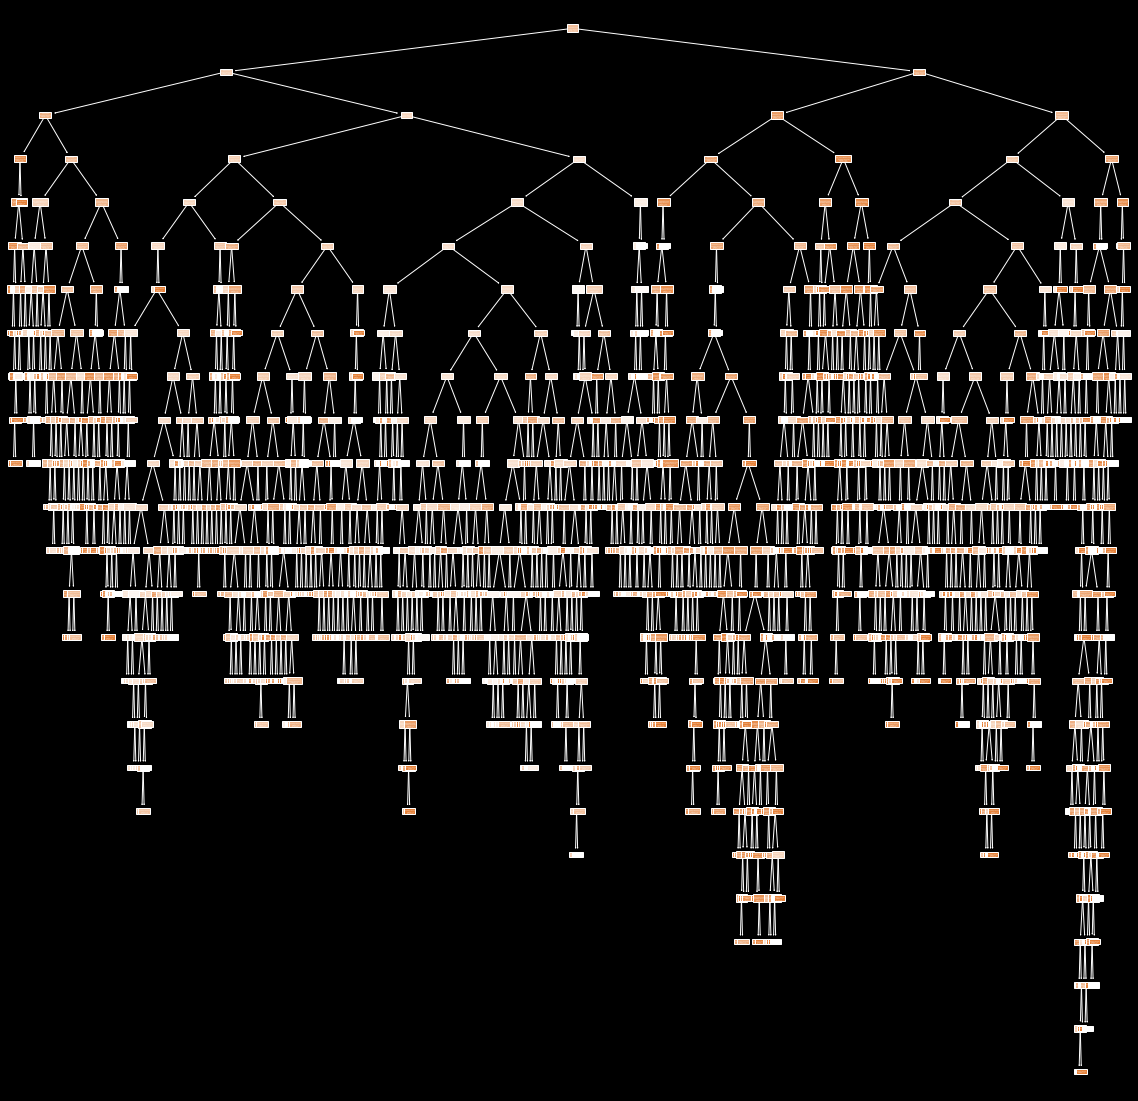

In [58]:
# 3.2.4 Visualize the tree

# use model.estimators_[n] as I used the random forest estimator

from sklearn import tree

rf.fit(X_train, y_train)

plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

In [60]:
# 3.2.5 feature importance

feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_imp) 
# drop features with low importance -> X = recidivism.loc[:, recidivism.columns.isin(['age', 'priors_count'])] might be enough

age                      0.418750
priors_count             0.297071
sex                      0.062182
race_Caucasian           0.041807
race_African-American    0.041005
juv_other_count          0.038893
race_Hispanic            0.027361
juv_misd_count           0.023789
juv_fel_count            0.023338
race_Other               0.019604
race_Asian               0.004365
race_Native American     0.001836
dtype: float64


---
Before you go, please, have a look at the following two activities:

1)

<mark> Take a minute (it is really one minute) to fill this [form](https://forms.gle/9RwhFc96na4E2Fmg7). It is really important for me to continue improving and give you better feedbacks. </mark>

---
2)

<mark> Some of you consider this course too easy. So, it's time to spice things up: once you have the best model you could find, go to DTU Learn and submit your code together with your final accuracy/precision/recall scores under DTU-Learn $\rightarrow$ Assignments. I'll make a Leaderboard and we'll see who's gonna win 🥇!!</mark>

**Constraints:** Use a 70/30 train/test split, and `random_seed=42`.

**Note 1:** Even if it is in the form of an assignment on DTU Learn it is **not** going to be evaluated. So, take it really as an opportunity to play around with your model and see how well you can do.

**Note 2:** You have time until **Thursday at 23.59** to submit your model/performance score.